In [1]:
%matplotlib notebook
from poses import Poses
from poses import plot
from calibration import calibrate
import numpy as np

# Get poses

In [2]:
bag_file_path = "/home/eric/Documents/Research/20_10_ExCalib/MCaV/input_data/lidar_odom.bag"
gps_topic = "/gps_pose"
lidar_topic = "/odom"

## GPS poses

In [3]:
gps_poses = Poses.from_pose_bag(gps_topic, bag_file_path)

[INFO]  Data folder /home/eric/Documents/Research/20_10_ExCalib/MCaV/input_data/lidar_odom already exists. Not creating.


## Lidar poses

In [4]:
lidar_poses = Poses.from_pose_bag(lidar_topic, bag_file_path)

[INFO]  Data folder /home/eric/Documents/Research/20_10_ExCalib/MCaV/input_data/lidar_odom already exists. Not creating.


In [5]:
rotation_trajectory = np.array(
[[0.0, 0.0, 1.0, 0.0],
 [1.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 1.0]])

lidar_poses.transform_pose_(rotation_trajectory)

In [6]:
rotation_orientation = np.array(
[[0.1736482, -0.9848077, 0.0000000],
 [0.9848077,  0.1736482, 0.0000000],
 [0.0000000,  0.0000000, 1.0000000]])

lidar_poses.rotate_orientation_(rotation_orientation)

## Interpolate poses

In [7]:
sync_timestamps = lidar_poses.sync_(gps_poses.timestamps)
gps_poses.sync_(sync_timestamps)

array([1.60391548e+09, 1.60391548e+09, 1.60391548e+09, ...,
       1.60391562e+09, 1.60391562e+09, 1.60391562e+09])

# Plot poses

<IPython.core.display.Javascript object>


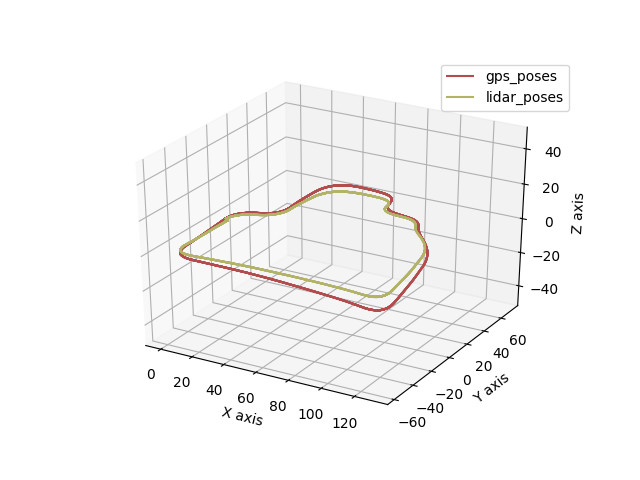

In [8]:
named_trajectories = {"gps_poses" : np.hstack((gps_poses.trajectory(), gps_poses.orientation())),
                      "lidar_poses": np.hstack((lidar_poses.trajectory(), lidar_poses.orientation()))}

plot(named_trajectories)

# Calibrate

In [9]:
T1, cov1 = gps_poses.egomotion()
T2, cov2 = lidar_poses.egomotion()

R_star, t_star, statusSuccess = calibrate(T1, T2, cov1, cov2)

if statusSuccess:
    print("Orientation:")
    print(R_star)
    print("Translation:")
    print(t_star)
else:
    print("Program Failed")

Orientation:
[[ 9.96991167e-01 -1.28209323e-05 -7.65033058e-02]
 [ 1.90075684e-03  9.99651170e-01  2.43559432e-02]
 [ 7.64842091e-02 -2.44286341e-02  9.96639065e-01]]
Translation:
[[ 6.76814583]
 [-1.41396695]
 [ 6.05248409]]
